In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import random
# the random module will be used to create transaction ID's

In [2]:
# data source: https://snap.stanford.edu/data/soc-sign-bitcoin-otc.html
trades = pd.read_csv("soc-sign-bitcoinotc.csv", names=['SOURCE', 'TARGET', 'RATING', 'TIME'])

In [3]:
print('shape:', trades.shape)
print('columns:', trades.columns)
print('basic info:', trades.info())

shape: (35592, 4)
columns: Index(['SOURCE', 'TARGET', 'RATING', 'TIME'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35592 entries, 0 to 35591
Data columns (total 4 columns):
SOURCE    35592 non-null int64
TARGET    35592 non-null int64
RATING    35592 non-null int64
TIME      35592 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.1 MB
basic info: None


In [4]:
# create column showing tuples of transactions
trades['from_to'] = list(trades[['SOURCE', 'TARGET']].itertuples(index=False, name=None))

In [5]:
trades.shape[0]

35592

In [6]:
# the next few steps will create column with transaction ID's;  ID's are 8-digits and begin with 4
draft_ids = random.sample(range(1000000, 9999999), trades.shape[0])

In [7]:
trades['draft_ids'] = draft_ids

In [8]:
trades['fours'] = '4'

In [9]:
trades['transaction_id'] = trades['fours'] + trades['draft_ids'].map(str)

In [10]:
trades.drop(columns=['draft_ids', 'fours'], inplace=True)

In [11]:
trades.head(10)

,SOURCE,TARGET,RATING,TIME,from_to,transaction_id
0,6,2,4,1.289242e+09,"(6, 2)",48055522
1,6,5,2,1.289242e+09,"(6, 5)",49471633
2,1,15,1,1.289243e+09,"(1, 15)",48231001
3,4,3,7,1.289245e+09,"(4, 3)",48920200
4,13,16,8,1.289254e+09,"(13, 16)",43574706
5,13,10,8,1.289254e+09,"(13, 10)",41310084
6,7,5,1,1.289363e+09,"(7, 5)",47392475
7,2,21,5,1.289371e+09,"(2, 21)",44392015
8,2,20,5,1.289371e+09,"(2, 20)",44677124
9,21,2,5,1.289381e+09,"(21, 2)",45901069


In [14]:
d = {}
ID = []
for id in trades['transaction_id']:
    d['ID'] = id
    ID.append(d.copy())

In [15]:
trades['ID'] = ID

In [16]:
trades['to_from_ID'] = list(trades[['SOURCE', 'TARGET', 'ID']].itertuples(index=False, name=None))

In [17]:
trades.head()

,SOURCE,TARGET,RATING,TIME,from_to,transaction_id,ID,to_from_ID
0,6,2,4,1.289242e+09,"(6, 2)",48055522,{'ID': '48055522'},"(6, 2, {'ID': '48055522'})"
1,6,5,2,1.289242e+09,"(6, 5)",49471633,{'ID': '49471633'},"(6, 5, {'ID': '49471633'})"
2,1,15,1,1.289243e+09,"(1, 15)",48231001,{'ID': '48231001'},"(1, 15, {'ID': '48231001'})"
3,4,3,7,1.289245e+09,"(4, 3)",48920200,{'ID': '48920200'},"(4, 3, {'ID': '48920200'})"
4,13,16,8,1.289254e+09,"(13, 16)",43574706,{'ID': '43574706'},"(13, 16, {'ID': '43574706'})"


In [18]:
df1 = trades[0:100]

In [19]:
# create single list of all nodes in the SOURCE and TARGET columns
source_unique = df1['SOURCE'].unique()
target_unique = df1['TARGET'].unique()
nodes_list = []
nodes_list.extend(source_unique)
nodes_list.extend(target_unique)
nodes_list = list(set(nodes_list))

In [20]:
print(nodes_list)

[1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 15, 16, 17, 19, 20, 21, 23, 25, 26, 28, 29, 31, 32, 34, 35, 36, 37, 39, 41, 44, 45, 46, 47, 51, 52, 53, 54, 55]


In [21]:
G1 = nx.DiGraph()

In [22]:
G1.add_nodes_from(nodes_list)

In [23]:
G1.add_edges_from(df1['from_to'])

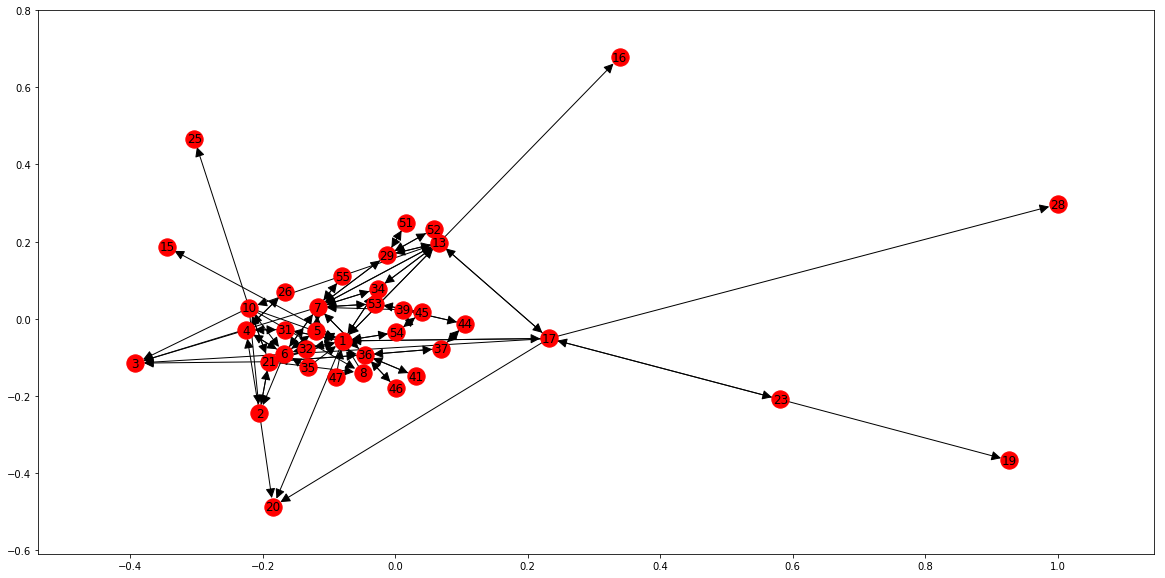

In [24]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G1)
nx.draw_networkx(G1, pos, arrowsize=20)
plt.show()

In [25]:
# let's have a look at the transactions that node 17 sent and received in the first hundred transactions:
df1.query("SOURCE == 17 | TARGET == 17")

,SOURCE,TARGET,RATING,TIME,from_to,transaction_id,ID,to_from_ID
14,17,3,5,1.289442e+09,"(17, 3)",44542145,{'ID': '44542145'},"(17, 3, {'ID': '44542145'})"
15,17,23,1,1.289490e+09,"(17, 23)",48268104,{'ID': '48268104'},"(17, 23, {'ID': '48268104'})"
32,17,28,1,1.289836e+09,"(17, 28)",44807601,{'ID': '44807601'},"(17, 28, {'ID': '44807601'})"
33,17,13,2,1.289873e+09,"(17, 13)",45032408,{'ID': '45032408'},"(17, 13, {'ID': '45032408'})"
34,13,17,2,1.289874e+09,"(13, 17)",45543697,{'ID': '45543697'},"(13, 17, {'ID': '45543697'})"
37,17,20,2,1.290108e+09,"(17, 20)",45948372,{'ID': '45948372'},"(17, 20, {'ID': '45948372'})"
52,1,17,9,1.290969e+09,"(1, 17)",47284865,{'ID': '47284865'},"(1, 17, {'ID': '47284865'})"
60,17,1,9,1.291218e+09,"(17, 1)",49027945,{'ID': '49027945'},"(17, 1, {'ID': '49027945'})"
70,23,17,1,1.291624e+09,"(23, 17)",49861456,{'ID': '49861456'},"(23, 17, {'ID': '49861456'})"


In [26]:
# In the diagram it appears that node 3 was on the strictly on the receiving end in the first 100 transactions:
df1.query("SOURCE == 3 | TARGET == 3")

,SOURCE,TARGET,RATING,TIME,from_to,transaction_id,ID,to_from_ID
3,4,3,7,1.289245e+09,"(4, 3)",48920200,{'ID': '48920200'},"(4, 3, {'ID': '48920200'})"
13,21,3,7,1.289442e+09,"(21, 3)",47941408,{'ID': '47941408'},"(21, 3, {'ID': '47941408'})"
14,17,3,5,1.289442e+09,"(17, 3)",44542145,{'ID': '44542145'},"(17, 3, {'ID': '44542145'})"
22,10,3,7,1.289556e+09,"(10, 3)",49371601,{'ID': '49371601'},"(10, 3, {'ID': '49371601'})"
88,7,3,6,1.292200e+09,"(7, 3)",48872914,{'ID': '48872914'},"(7, 3, {'ID': '48872914'})"


In [27]:
# this can also be shown using the following methods:
print(list(G1.predecessors(3)))
print(list(G1.successors(3)))

[4, 21, 17, 10, 7]
[]


In [29]:
# next we will use the same data to draw a multigraph
G2 = nx.MultiGraph()

In [30]:
G2.add_nodes_from(nodes_list)

In [31]:
G2.add_edges_from(df1['to_from_ID'])
G2[4]

AdjacencyView({3: {0: {'ID': '48920200'}}, 26: {0: {'ID': '45604721'}, 1: {'ID': '42307864'}}, 6: {0: {'ID': '46018265'}, 1: {'ID': '46626573'}}, 2: {0: {'ID': '45900974'}}, 31: {0: {'ID': '46630109'}, 1: {'ID': '44452342'}}})

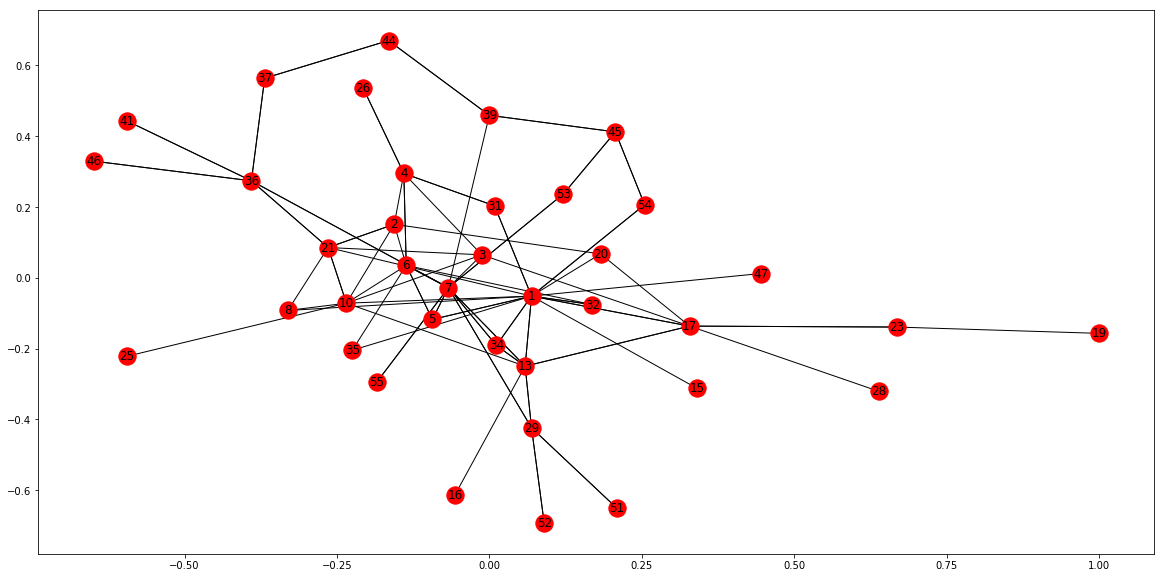

In [33]:
plt.figure(figsize=(20, 10))
nx.draw_networkx(G2)